# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Dataset Fields Decription

- User_ID               :	User ID
- Product_ID            :	Product ID
- Gender                :	Sex of User
- Age                   :	Age in bins
- Occupation            :	Occupation(Masked)
- City_Category         :	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status        :	Marital Status
- ProductCategory       :	Product Category (Masked)
- Purchase              :	Purchase Amount

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import scipy.stats as st
from scipy.stats import norm

## 1. Checking the structure & characteristics of the dataset.

In [4]:
df = pd.read_csv('walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.shape

(550068, 10)

- There are total 550068 rows and 10 columns in data.

### Value Count for each Column : Showing unique values along with frequency -

In [12]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [13]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [18]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [16]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [17]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [32]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [37]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [39]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [40]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

### Observation :- 
- There are total of 550068 rows and 10 columns
- There are no null values all columns 
- User_ID , Occupation, Marital_Status , Product_Category , Purchase are numeric (int) Fields 
- Product_ID , Gender , Age ,Stay_In_Current_City_Years , Marital_Status are Object Fields.
- Also shown above the unique values in each column along with their frequecy .

## 2. Null values & Outliers Detection

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


-  Converting few int column to object based on seeing the unique values in it and logic
- Marital Status has only 2 unique values 0 and 1 so it should be an object data type.
- User_ID should be Object data type as if we treat it as int and then taking out its mean,standard deviation,variance will not convey correct and right info.
- Occupation and Product_Category is also something which must be Object Column and not treated as int 

In [64]:
df['Product_Category'] = df['Product_Category'].astype(object)
df['Marital_Status'] = df['Marital_Status'].astype(object)
df['User_ID']=df['User_ID'].astype(object)
df['Occupation'] = df['Occupation'].astype(object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [66]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

- There are no NULL values in all columns in given dataset.

In [67]:
df.describe(include=object)  # For object type column

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [68]:
df_describe = df.describe() # For all int type columns
df_describe

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [69]:
df_describe.loc['IQR',:]=df_describe.loc['75%',:] - df_describe.loc['25%',:]
df_describe

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000
IQR,6231.000000


In [70]:
df_describe.loc['Upper Wisker',:] = df_describe.loc['75%',:] + (1.5* df_describe.loc['IQR',:])
df_describe.loc['Lower Wisker',:] = df_describe.loc['25%',:] - (1.5* df_describe.loc['IQR',:])
df_describe

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000
IQR,6231.000000
Upper Wisker,21400.500000


- Any value in a column which is greater than (>) then Upper Wisker( UW) or any value in a column which is less than (<) then Lower Wisker(LW) is called 'OUTLIER'
- Mean is sensitive to outliers and median is not sensitive to outliers , so more the outliers in a column the mean is changed more.

### Box Plot 

Total Outliers in Purchase Column =  2677


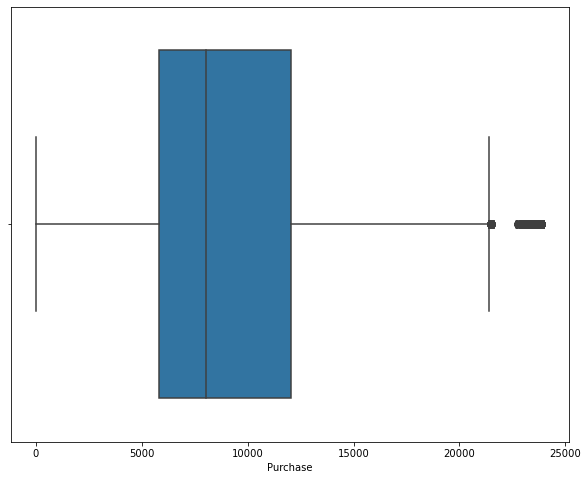

In [75]:
num_Purchase_Outliers= df[(df['Purchase'] > df_describe.loc['Upper Wisker','Purchase']) | (df['Purchase'] < df_describe.loc['Lower Wisker','Purchase'])]
print('Total Outliers in Purchase Column = ',num_Purchase_Outliers.shape[0])


plt.figure(figsize=(10,8))
sns.boxplot(x=df['Purchase'])
plt.show()

## 3. Data exploration - Male and Female Data

In [97]:
df_male = df.loc[df['Gender'] =='M',: ]
df_female = df.loc[df['Gender']=='F',:]

In [90]:
print(df_male.shape)
print(df_female.shape)

(414259, 10)
(135809, 10)


In [91]:
# Average Male Expenses
df_male['Purchase'].mean()

9437.526040472265

In [92]:
# Average Female Expenses
df_female['Purchase'].mean()

8734.565765155476

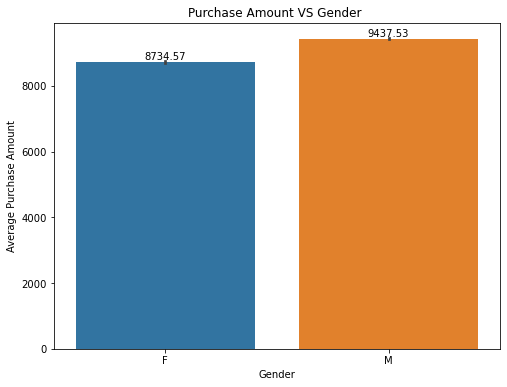

In [86]:
plt.figure(figsize=(8,6))

ax= sns.barplot(data = df , x='Gender' , y="Purchase")

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('Average Purchase Amount')
plt.xlabel('Gender')

plt.title('Purchase Amount VS Gender ')
plt.show()

- Seeing above Bar Plot we can see Average Purchase amount / expenses of Male is higher than Female 

In [87]:
df_male.describe()

,Purchase
count,414259.00000
mean,9437.52604
std,5092.18621
min,12.00000
25%,5863.00000
50%,8098.00000
75%,12454.00000
max,23961.00000


In [88]:
df_female.describe()

,Purchase
count,135809.000000
mean,8734.565765
std,4767.233289
min,12.000000
25%,5433.000000
50%,7914.000000
75%,11400.000000
max,23959.000000


## NOTE :

#### While sample() and choice() return a list of multiple random elements. sample() is for random sampling without replacement, whereas choice() is for random sampling with replacement.

In [82]:
import random


ll =pd.Series( list(range(10)))

print(ll.sample(10).values)
# [6, 9, 0, 2, 4, 3, 5, 1, 8, 7]

print(np.random.choice(ll, size=10))
# [5, 9, 5, 2, 7, 6, 2, 9, 9, 8]

[4 2 9 0 3 1 6 5 8 7]
[9 0 2 6 8 6 3 5 2 6]


In [83]:
# Note : sample() does not produce repeating elements, while choice() does

In [ ]:
# 95% CI for male and female spends 
# Ways to calculate CI :- 

### Method 1: Using formula Directly

In [131]:

norm.interval(alpha = 0.95, loc= df_males['Purchase'].mean() , scale = st.sem(df_males['Purchase'])) 

(9422.01944736257, 9453.032633581959)

In [110]:

norm.interval(alpha = 0.95, loc= df_females['Purchase'].mean() , scale = st.sem(df_females['Purchase'])) 

(8709.21154714068, 8759.919983170272)

### Method  2: Bootstrapping

In [114]:
# Using sample method to select samples

sample_size = 3000
iterations = 2000
df_males = df[df.Gender=='M']
male_spends = []
for iter in range(iterations):
    male_spends.append(
    df_males.sample(sample_size)['Purchase'].mean())

print(np.percentile(male_spends,[2.5,97.5]))


df_females = df[df.Gender=='F']
female_spends = []
for iter in range(iterations):
    female_spends.append(
    df_females.sample(sample_size)['Purchase'].mean())
    
print(np.percentile(female_spends,[2.5,97.5]))

[9252.31725    9615.39660833]
[8567.33763333 8902.64010833]


In [124]:
# Using Random choice to select samples

sample_size = 3000
iterations = 2000
df_males = df[df.Gender=='M']
male_spends = []
for iter in range(iterations):
    male_spends.append(
    np.mean(np.random.choice(df_males['Purchase'], size=sample_size)))
    
print(np.percentile(male_spends,[2.5,97.5]))


df_females = df[df.Gender=='F']
female_spends = []
for iter in range(iterations):
    female_spends.append(
    np.random.choice(df_females['Purchase'], size=sample_size).mean())
    
print(np.percentile(female_spends,[2.5,97.5]))



[9253.42754167 9619.070575  ]
[8565.26433333 8899.62225   ]


In [137]:

iterations = 10000

def boot_strap_method(data, sample_size,confidence_intterval):
    ans=[]
    for reps in range(iterations):
        bootstrapped_samples = np.random.choice(data, size=sample_size)
        bootstrapped_mean =  np.mean(bootstrapped_samples)
        ans.append(bootstrapped_mean)
    # % CI : [x1,x2]
    x1 = np.percentile(ans,2.5)
    x2 = np.percentile(ans,97.5)
    return [x1,x2]

print(boot_strap_method(data = df_males['Purchase'], sample_size = 30000,confidence_intterval = 95))
print(boot_strap_method(data = df_females['Purchase'], sample_size =30000,confidence_intterval = 95))

[9378.8970225, 9495.125881666667]
[8681.756815, 8788.889669166667]


### Method 3 : Thoeritical Formula

In [126]:
# Using Theoritical Formula : CI = [u - Z*std_error , u + Z*std_error ]

# males
min_male = np.mean(male_spends) - 1.96*np.std(male_spends)
max_male = np.mean(male_spends) + 1.96*np.std(male_spends)
print(min_male, max_male)

# Note : The mean here is mean of array of sample means generated in bootstrap method 
# We cannot take mean = np.mean(df_males['Purchase']) as this will give population mean and 
# we need to take the mean of sample means so we used male_spends and female_spends
 
# females
min_female = np.mean(female_spends) - 1.96*np.std(female_spends)
max_female = np.mean(female_spends) + 1.96*np.std(female_spends)
print(min_female, max_female)


9254.864001835746 9613.738453164251
8564.115658762965 8899.66639957037


### 95% Confidence Interval for Male Average Spends

In [21]:
# Method 1 : Using Formula Directly 
norm.interval(alpha = 0.95, loc= df_male['Purchase'].mean() , scale = st.sem(df_male['Purchase'])) 

(9422.01944736257, 9453.032633581959)

In [138]:
# Method 2 : Bootstrapping Method 

def boot_strap_method(data, sample_size,confidence_intterval):
    ans=[]
    for reps in range(1000):
        bootstrapped_samples = np.random.choice(data, size=sample_size)
        bootstrapped_mean =  np.mean(bootstrapped_samples)
        ans.append(bootstrapped_mean)
    # % CI : [x1,x2]
    x1 = np.percentile(ans,(100-confidence_intterval)/2)
    x2 = np.percentile(ans,confidence_intterval + (100-confidence_intterval)/2)
    return [np.round(x1,2),np.round(x2,2)]

In [139]:
# Boot Strap method with sample size = 100 
boot_strap_method(data = df_male['Purchase'], sample_size = 100,confidence_intterval = 95)

[8368.97, 10545.83]

In [140]:
# Boot Strap method with sample size = 500 
boot_strap_method(data = df_male['Purchase'], sample_size = 500,confidence_intterval = 95)

[9023.6, 9892.15]

In [141]:
# Boot Strap method with sample size = 1000 
boot_strap_method(data = df_male['Purchase'], sample_size = 1000,confidence_intterval = 95)

[9088.7, 9736.69]

In [142]:
# Boot Strap method with sample size = 5000 
boot_strap_method(data = df_male['Purchase'], sample_size = 3000,confidence_intterval = 95)

[9261.03, 9619.54]

In [144]:
# Boot Strap method with sample size = 7000 
boot_strap_method(data = df_male['Purchase'], sample_size = 7000,confidence_intterval = 95)

[9318.93, 9558.98]

In [145]:
# Boot Strap method with sample size = 10000
boot_strap_method(data = df_male['Purchase'], sample_size = 10000,confidence_intterval = 95)

[9332.16, 9536.3]

- In Bootstrap method we observe that as sample size we increase the Confidence Interval becomes more accurate -> Confidence Interval becomes closer to the CI value got directly from norm.interval formula
- 95% CI (Confidence Interval) we means that " there is a 95% chance that the confidence interval [9422,9453] (approx) contains true population mean spend of male.

### 95% Confidence Interval for Female Average Spends

In [148]:
# Method 1 : Using Formula Directly 
norm.interval(alpha = 0.95, loc= df_female['Purchase'].mean() , scale = st.sem(df_female['Purchase'])) 

(8709.21154714068, 8759.919983170272)

In [155]:
# Method 2 : Bootstrapping Method 

print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 100,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 500,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 1000,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 5000,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 10000,confidence_intterval = 95) )

CI using Boot Strap method with sample size = 100  : [7832.21, 9748.58]
CI using Boot Strap method with sample size = 500  : [8347.44, 9177.22]
CI using Boot Strap method with sample size = 1000  : [8446.1, 9031.88]
CI using Boot Strap method with sample size = 5000  : [8594.98, 8857.77]
CI using Boot Strap method with sample size = 10000  : [8635.22, 8823.6]


#### Observation 95%CI :
- 95% CI for Male Average Spends  = [9422 , 9453]   ( Note : Have rounded the 2 decimal places in CI )
- 95% CI for Female Average Spends= [8709 , 8760]   ( Note : Have rounded the 2 decimal places in CI )
- There is a 95% chance that the confidence interval [9422,9453] contains true population mean spend of male.
- There is a 95% chance that the confidence interval [8709 , 8760] contains true population mean spend of female.
- So from this we can also conclude that male population average spends is more than spends of female as the CI interval of male has higher lower and upper paramters in 95% CI ap compared to femal 95% CI.
- 95% Confidence intervals of average male and female spends are NOT OVERLAPPING

### 90% Confidence Interval for Male and Female Average Spends

In [150]:
# Method 1 : Using Formula Directly 
print('90% CI for Male Average Spends :',
      norm.interval(alpha = 0.90, loc= df_male['Purchase'].mean() , scale = st.sem(df_male['Purchase'])) )

print('90% CI for Female Average Spends :',
      norm.interval(alpha = 0.90, loc= df_female['Purchase'].mean() , scale = st.sem(df_female['Purchase'])) )

90% CI for Male Average Spends : (9424.512497305488, 9450.539583639042)
90% CI for Female Average Spends : (8713.287834648021, 8755.84369566293)


In [151]:
# Method 2 : Bootstrapping Method 
print("90% CI for Male Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 100,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 500,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 1000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 5000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 10000,confidence_intterval = 90) )


print("\n\n90% CI for Female Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 100,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 500,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 1000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 5000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 10000,confidence_intterval = 90) )

90% CI for Male Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8649.23, 10211.23]
CI using Boot Strap method with sample size = 500  : [9079.34, 9801.68]
CI using Boot Strap method with sample size = 1000  : [9179.88, 9711.25]
CI using Boot Strap method with sample size = 5000  : [9316.32, 9550.75]
CI using Boot Strap method with sample size = 10000  : [9352.01, 9517.78]


90% CI for Female Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [7937.0, 9575.46]
CI using Boot Strap method with sample size = 500  : [8395.76, 9094.85]
CI using Boot Strap method with sample size = 1000  : [8486.7, 8967.58]
CI using Boot Strap method with sample size = 5000  : [8618.18, 8847.46]
CI using Boot Strap method with sample size = 10000  : [8656.82, 8816.98]


#### Observation 90%CI :
- 90% CI for Male Average Spends  = [9424 , 9450]   ( Note : Have rounded the 2 decimal places in CI )
- 90% CI for Female Average Spends= [8713 , 8756]   ( Note : Have rounded the 2 decimal places in CI )
- There is a 90% chance that the confidence interval [9424 , 9450] contains true population mean spend of male.
- There is a 90% chance that the confidence interval [8713 , 8756] contains true population mean spend of female.
- So from this we can also conclude that male population average spends is more than spends of female as the CI interval of male has higher lower and upper paramters in 90% CI ap compared to femal 90% CI.
- 90% Confidence intervals of average male and female spends are NOT OVERLAPPING

### 99% Confidence Interval for Male and Female Average Spends

In [156]:
# Method 1 : Using Formula Directly 
print('90% CI for Male Average Spends :',
      norm.interval(alpha = 0.99, loc= df_male['Purchase'].mean() , scale = st.sem(df_male['Purchase'])) )

print('90% CI for Female Average Spends :',
      norm.interval(alpha = 0.99, loc= df_female['Purchase'].mean() , scale = st.sem(df_female['Purchase'])) )

90% CI for Male Average Spends : (9417.146922669479, 9457.90515827505)
90% CI for Female Average Spends : (8701.244674438389, 8767.886855872563)


In [157]:
# Method 2 : Bootstrapping Method 
print("99% CI for Male Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 100,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 500,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 1000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 5000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_male['Purchase'], sample_size = 10000,confidence_intterval = 99) )


print("\n\n99% CI for Female Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 100,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 500,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 1000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 5000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_female['Purchase'], sample_size = 10000,confidence_intterval = 99) )

99% CI for Male Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8230.15, 10743.64]
CI using Boot Strap method with sample size = 500  : [8874.86, 10064.24]
CI using Boot Strap method with sample size = 1000  : [9071.23, 9881.38]
CI using Boot Strap method with sample size = 5000  : [9250.52, 9647.12]
CI using Boot Strap method with sample size = 10000  : [9307.2, 9574.07]


99% CI for Female Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [7526.19, 9955.32]
CI using Boot Strap method with sample size = 500  : [8143.18, 9270.51]
CI using Boot Strap method with sample size = 1000  : [8362.94, 9102.09]
CI using Boot Strap method with sample size = 5000  : [8564.02, 8895.8]
CI using Boot Strap method with sample size = 10000  : [8616.12, 8847.03]


#### Observation 99%CI :
- 99% CI for Male Average Spends  = [9417 , 9458]   ( Note : Have rounded the 2 decimal places in CI )
- 99% CI for Female Average Spends= [8701 , 8768]   ( Note : Have rounded the 2 decimal places in CI )
- There is a 99% chance that the confidence interval [9417 , 9458]  contains true population mean spend of male.
- There is a 99% chance that the confidence interval [8701 , 8768] contains true population mean spend of female.
- So from this we can also conclude that male population average spends is more than spends of female as the CI interval of male has higher lower and upper paramters in 99% CI ap compared to femal 99% CI.
- 99% Confidence intervals of average male and female spends are NOT OVERLAPPING

## 4. Data exploration - Marital Status Data

In [158]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [159]:
# Marital Status Column has value 0 and 1 . Considering 0 as 'Single' / 'Unmarried' Marital Status and 
# 1 as 'Partnered'/'Married' Marital Status
df_single    = df.loc[df['Marital_Status'] ==  0,: ]
df_partnered = df.loc[df['Marital_Status'] ==  1,: ]

In [160]:
df_single.shape

(324731, 10)

In [161]:
df_partnered.shape

(225337, 10)

In [162]:
# Average Single Marital Status Expense
df_single['Purchase'].mean()

9265.907618921507

In [163]:
# Average Partnered Marital Status Expense
df_partnered['Purchase'].mean()

9261.174574082374

### 90% Confidence Interval for Single and Partnered Marital Status Spends

In [164]:
# Method 1 : Using Formula Directly 
print('90% CI for Single Marital Status Average Spends :',
      norm.interval(alpha = 0.90, loc= df_single['Purchase'].mean() , scale = st.sem(df_single['Purchase'])) )

print('90% CI for Partnered Marital Status Average Spends :',
      norm.interval(alpha = 0.90, loc= df_partnered['Purchase'].mean() , scale = st.sem(df_partnered['Purchase'])) )

90% CI for Single Marital Status Average Spends : (9251.396385823671, 9280.418852019342)
90% CI for Partnered Marital Status Average Spends : (9243.790713903045, 9278.558434261702)


In [165]:
# Method 2 : Bootstrapping Method 
print("90% CI for Single Marital Status Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 100,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 500,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 1000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 5000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 10000,confidence_intterval = 90) )


print("\n\n90% CI for Partnered Marital Status Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 100,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 500,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 1000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 5000,confidence_intterval = 90) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 10000,confidence_intterval = 90) )

90% CI for Single Marital Status Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8393.48, 10040.58]
CI using Boot Strap method with sample size = 500  : [8886.58, 9639.42]
CI using Boot Strap method with sample size = 1000  : [9014.44, 9547.21]
CI using Boot Strap method with sample size = 5000  : [9155.89, 9382.96]
CI using Boot Strap method with sample size = 10000  : [9183.29, 9345.18]


90% CI for Partnered Marital Status Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8443.55, 10166.49]
CI using Boot Strap method with sample size = 500  : [8890.89, 9609.69]
CI using Boot Strap method with sample size = 1000  : [9001.34, 9531.11]
CI using Boot Strap method with sample size = 5000  : [9148.53, 9379.13]
CI using Boot Strap method with sample size = 10000  : [9179.59, 9343.38]


#### Observation 90%CI :
- 90% CI for Single Status Average Spends  = [9252 , 9281]   ( Note : Have rounded the 2 decimal places in CI )
- 90% CI for Partnered Average Spends= [9244, 9278]   ( Note : Have rounded the 2 decimal places in CI )
- There is a 90% chance that the confidence interval [9252 , 9281]  contains true population mean spend of Single Marital Status people.
- There is a 90% chance that the confidence interval [9244, 9278]contains true population mean spend of Partnered Marital Status people.
- So from this we can also conclude that Single Marital Status population average spends is slightly more than spends of Partnered Marital Status people as the CI interval of Single status people has higher lower and upper paramters in 90% CI ap compared to Partnered Marital Status 90% CI.
- 90% Confidence intervals of average spends of Single and Partnered marital status people ARE OVERLAPPING in average spends range of (9252,9278)

### 95% Confidence Interval for Single and Partnered Marital Status Spends

In [166]:
# Method 1 : Using Formula Directly 
print('95% CI for Single Marital Status Average Spends :',
      norm.interval(alpha = 0.95, loc= df_single['Purchase'].mean() , scale = st.sem(df_single['Purchase'])) )

print('95% CI for Partnered Marital Status Average Spends :',
      norm.interval(alpha = 0.95, loc= df_partnered['Purchase'].mean() , scale = st.sem(df_partnered['Purchase'])) )

95% CI for Single Marital Status Average Spends : (9248.61641818668, 9283.198819656332)
95% CI for Partnered Marital Status Average Spends : (9240.460427057078, 9281.888721107669)


In [167]:
# Method 2 : Bootstrapping Method 
print("95% CI for Single Marital Status Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 100,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 500,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 1000,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 5000,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 10000,confidence_intterval = 95) )


print("\n\n95% CI for Partnered Marital Status Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 100,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 500,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 1000,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 5000,confidence_intterval = 95) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 10000,confidence_intterval = 95) )

95% CI for Single Marital Status Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8300.06, 10205.78]
CI using Boot Strap method with sample size = 500  : [8831.29, 9733.72]
CI using Boot Strap method with sample size = 1000  : [8963.47, 9615.22]
CI using Boot Strap method with sample size = 5000  : [9128.9, 9400.9]
CI using Boot Strap method with sample size = 10000  : [9158.01, 9371.43]


95% CI for Partnered Marital Status Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8272.57, 10263.51]
CI using Boot Strap method with sample size = 500  : [8795.22, 9685.16]
CI using Boot Strap method with sample size = 1000  : [8956.7, 9567.72]
CI using Boot Strap method with sample size = 5000  : [9124.35, 9406.23]
CI using Boot Strap method with sample size = 10000  : [9161.5, 9357.99]


#### Observation 95%CI :
- 95% CI for Single Status Average Spends  = [9249 , 9283]   ( Note : Have rounded the 2 decimal places in CI )
- 95% CI for Partnered Average Spends= [9240, 9282]   ( Note : Have rounded the 2 decimal places in CI )
- There is a 95% chance that the confidence interval [9249 , 9283]  contains true population mean spend of Single Marital Status customer.
- There is a 95% chance that the confidence interval [9240, 9282] contains true population mean spend of Partnered Marital Status customer.
- So from this we can also conclude that Single Marital Status population average spends is slightly more than spends of Partnered Marital Status people as the CI interval of Single status people has higher lower and upper paramters in 95% CI ap compared to Partnered Marital Status  95% CI.
- 95% Confidence intervals of average spends of Single and Partnered marital status customers ARE OVERLAPPING in average spends range of (9249,9282)

### 99% Confidence Interval for Single and Partnered Marital Status Spends

In [168]:
# Method 1 : Using Formula Directly 
print('99% CI for Single Marital Status Average Spends :',
      norm.interval(alpha = 0.99, loc= df_single['Purchase'].mean() , scale = st.sem(df_single['Purchase'])) )

print('99% CI for Partnered Marital Status Average Spends :',
      norm.interval(alpha = 0.99, loc= df_partnered['Purchase'].mean() , scale = st.sem(df_partnered['Purchase'])) )

99% CI for Single Marital Status Average Spends : (9243.183129136169, 9288.632108706845)
99% CI for Partnered Marital Status Average Spends : (9233.951570329937, 9288.39757783481)


In [169]:
# Method 2 : Bootstrapping Method 
print("99% CI for Single Marital Status Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 100,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 500,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 1000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 5000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_single['Purchase'], sample_size = 10000,confidence_intterval = 99) )


print("\n\n99% CI for Partnered Marital Status Average Spends with different sample size :- ")
print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 100,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 500,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 1000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 5000,confidence_intterval = 99) )

print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = df_partnered['Purchase'], sample_size = 10000,confidence_intterval = 99) )

99% CI for Single Marital Status Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8026.78, 10589.32]
CI using Boot Strap method with sample size = 500  : [8694.05, 9912.02]
CI using Boot Strap method with sample size = 1000  : [8817.22, 9658.68]
CI using Boot Strap method with sample size = 5000  : [9093.61, 9434.06]
CI using Boot Strap method with sample size = 10000  : [9136.05, 9391.02]


99% CI for Partnered Marital Status Average Spends with different sample size :- 
CI using Boot Strap method with sample size = 100  : [8018.89, 10467.19]
CI using Boot Strap method with sample size = 500  : [8653.61, 9798.54]
CI using Boot Strap method with sample size = 1000  : [8848.88, 9672.66]
CI using Boot Strap method with sample size = 5000  : [9086.43, 9441.24]
CI using Boot Strap method with sample size = 10000  : [9134.47, 9398.49]


#### Observation 99%CI :
- 99% CI for Single Status Average Spends  = [9243 , 9288]   ( Note : Have rounded the 2 decimal places in CI )
- 99% CI for Partnered Average Spends= [9234, 9289]   ( Note : Have rounded the 2 decimal places in CI )
- There is a 99% chance that the confidence interval [9243 , 9288]  contains true population mean spend of Single Marital Status customer.
- There is a 99% chance that the confidence interval [9234, 9289]  contains true population mean spend of Partnered Marital Status customer.
- So from this we can also conclude that Single Marital Status population average spends is slightly more than spends of Partnered Marital Status people as the CI interval of Single status people has higher lower paramters in 99% CI ap compared to Partnered Marital Status 99% CI.
- 99% Confidence intervals of average spends of Single and Partnered marital status customers ARE OVERLAPPING in average spends range of (9243,9288)

## 5. Data exploration - Age

In [170]:
# There are 7 age groups / categories in Age column
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [171]:
df_26_to_35    = df.loc[df['Age'] ==  '26-35',: ]
df_36_to_45    = df.loc[df['Age'] ==  '36-45',: ]
df_18_to_25    = df.loc[df['Age'] ==  '18-25',: ]
df_46_to_50    = df.loc[df['Age'] ==  '46-50',: ]
df_51_to_55    = df.loc[df['Age'] ==  '51-55',: ]
df_55_plus     = df.loc[df['Age'] ==  '55+',: ]
df_0_to_17     = df.loc[df['Age'] ==  '0-17',: ]

In [172]:
print('Mean =', df_26_to_35['Purchase'].mean())
df_26_to_35.shape

Mean = 9252.690632869888


(219587, 10)

In [173]:
print('Mean =', df_36_to_45['Purchase'].mean())
df_36_to_45.shape

Mean = 9331.350694917874


(110013, 10)

In [174]:
print('Mean =', df_18_to_25['Purchase'].mean())
df_18_to_25.shape

Mean = 9169.663606261289


(99660, 10)

In [175]:
print('Mean =', df_46_to_50['Purchase'].mean())
df_46_to_50.shape

Mean = 9208.625697468327


(45701, 10)

In [176]:
print('Mean =', df_51_to_55['Purchase'].mean())
df_51_to_55.shape

Mean = 9534.808030960236


(38501, 10)

In [177]:
print('Mean =', df_55_plus['Purchase'].mean())
df_55_plus.shape

Mean = 9336.280459449405


(21504, 10)

In [178]:
print('Mean =', df_0_to_17['Purchase'].mean())
df_0_to_17.shape

Mean = 8933.464640444974


(15102, 10)

### 90% Confidence Interval for each Age Group average Spends

In [179]:
# Method 1 : Using Formula Directly 
age_groups = df['Age'].value_counts().index
for i in age_groups:
    data = df.loc[df['Age'] == i,'Purchase']
    print('90% CI for Age Group '+i+' Average Spends:',
          norm.interval(alpha = 0.90, loc= data.mean() , scale = st.sem(data)) )

90% CI for Age Group 26-35 Average Spends: (9235.103000581124, 9270.278265158651)
90% CI for Age Group 36-45 Average Spends: (9306.441376202305, 9356.260013633442)
90% CI for Age Group 18-25 Average Spends: (9143.433031607847, 9195.89418091473)
90% CI for Age Group 46-50 Average Spends: (9170.406859081895, 9246.84453585476)
90% CI for Age Group 51-55 Average Spends: (9492.161430973249, 9577.454630947223)
90% CI for Age Group 55+ Average Spends: (9280.067707714425, 9392.493211184385)
90% CI for Age Group 0-17 Average Spends: (8865.053694527898, 9001.87558636205)


In [180]:
# Method 2 : Bootstrapping Method 
age_groups = df['Age'].value_counts().index
for i in age_groups:
    data_ = df.loc[df['Age'] == i,'Purchase']
    print("For Age Group ",i)
    print("CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = data_, sample_size = 100,confidence_intterval = 90) )
    print("CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = data_, sample_size = 500,confidence_intterval = 90) )
    print("CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = data_, sample_size = 1000,confidence_intterval = 90) )
    print("CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = data_, sample_size = 5000,confidence_intterval = 90) )
    print("CI using Boot Strap method with sample size = 7000  :",
      boot_strap_method(data = data_, sample_size = 7000,confidence_intterval = 90) )
    print("CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = data_, sample_size = 10000,confidence_intterval = 90) )
    print("\n")

For Age Group  26-35
CI using Boot Strap method with sample size = 100  : [8416.81, 10121.22]
CI using Boot Strap method with sample size = 500  : [8897.33, 9613.49]
CI using Boot Strap method with sample size = 1000  : [9007.09, 9517.34]
CI using Boot Strap method with sample size = 5000  : [9136.22, 9368.88]
CI using Boot Strap method with sample size = 7000  : [9158.39, 9355.08]
CI using Boot Strap method with sample size = 10000  : [9169.36, 9341.09]


For Age Group  36-45
CI using Boot Strap method with sample size = 100  : [8507.42, 10171.62]
CI using Boot Strap method with sample size = 500  : [8936.38, 9725.91]
CI using Boot Strap method with sample size = 1000  : [9075.86, 9601.94]
CI using Boot Strap method with sample size = 5000  : [9221.85, 9447.65]
CI using Boot Strap method with sample size = 7000  : [9234.11, 9429.0]
CI using Boot Strap method with sample size = 10000  : [9250.41, 9411.92]


For Age Group  18-25
CI using Boot Strap method with sample size = 100  : [8294

#### Observation :-
- 90% CI for Age Group 26-35 Average Spends: (9235, 9270)
- 90% CI for Age Group 36-45 Average Spends: (9306, 9356)
- 90% CI for Age Group 18-25 Average Spends: (9143, 9195)
- 90% CI for Age Group 46-50 Average Spends: (9170, 9246)
- 90% CI for Age Group 51-55 Average Spends: (9492, 9577)
- 90% CI for Age Group 55+ Average Spends:   (9280, 9392)
- 90% CI for Age Group 0-17 Average Spends:  (8864, 9001)
- 90% Confidence Interval are overlapping for Age Group 18-25 and 46-50 with average spend in range (9170,9195). And there is overlapping for Age group 36-45 and 55+ with average spend in range (9306,9356) .  

### 95% Confidence Interval for each Age Group average Spends

In [181]:
# Method 1 : Using Formula Directly 
age_groups = df['Age'].value_counts().index
for i in age_groups:
    data = df.loc[df['Age'] == i,'Purchase']
    print('95% CI for Age Group '+i+' Average Spends:',
          norm.interval(alpha = 0.95, loc= data.mean() , scale = st.sem(data)) )

95% CI for Age Group 26-35 Average Spends: (9231.733676400028, 9273.647589339747)
95% CI for Age Group 36-45 Average Spends: (9301.669410965314, 9361.031978870433)
95% CI for Age Group 18-25 Average Spends: (9138.407948753442, 9200.919263769136)
95% CI for Age Group 46-50 Average Spends: (9163.085142648752, 9254.166252287903)
95% CI for Age Group 51-55 Average Spends: (9483.991472776577, 9585.624589143894)
95% CI for Age Group 55+ Average Spends: (9269.29883441773, 9403.262084481079)
95% CI for Age Group 0-17 Average Spends: (8851.947970542686, 9014.981310347262)


In [182]:
# Method 2 : Bootstrapping Method 
age_groups = df['Age'].value_counts().index
for i in age_groups:
    data_ = df.loc[df['Age'] == i,'Purchase']
    print("For Age Group ",i)
    print("95% CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = data_, sample_size = 100,confidence_intterval = 95) )
    print("95% CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = data_, sample_size = 500,confidence_intterval = 95) )
    print("95% CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = data_, sample_size = 1000,confidence_intterval = 95) )
    print("95% CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = data_, sample_size = 5000,confidence_intterval = 95) )
    print("95% CI using Boot Strap method with sample size = 7000  :",
      boot_strap_method(data = data_, sample_size = 7000,confidence_intterval = 95) )
    print("95% CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = data_, sample_size = 10000,confidence_intterval = 95) )
    print("\n")

For Age Group  26-35
95% CI using Boot Strap method with sample size = 100  : [8312.67, 10203.85]
95% CI using Boot Strap method with sample size = 500  : [8836.24, 9664.65]
95% CI using Boot Strap method with sample size = 1000  : [8957.23, 9568.95]
95% CI using Boot Strap method with sample size = 5000  : [9119.1, 9386.16]
95% CI using Boot Strap method with sample size = 7000  : [9129.56, 9365.02]
95% CI using Boot Strap method with sample size = 10000  : [9153.27, 9343.94]


For Age Group  36-45
95% CI using Boot Strap method with sample size = 100  : [8394.42, 10460.53]
95% CI using Boot Strap method with sample size = 500  : [8916.26, 9759.87]
95% CI using Boot Strap method with sample size = 1000  : [9009.98, 9663.09]
95% CI using Boot Strap method with sample size = 5000  : [9192.63, 9476.25]
95% CI using Boot Strap method with sample size = 7000  : [9206.71, 9451.37]
95% CI using Boot Strap method with sample size = 10000  : [9221.36, 9424.0]


For Age Group  18-25
95% CI usin

#### Observation :-
- 95% CI for Age Group 26-35 Average Spends: (9231, 9273)
- 95% CI for Age Group 36-45 Average Spends: (9301, 9361)
- 95% CI for Age Group 18-25 Average Spends: (9138, 9200)
- 95% CI for Age Group 46-50 Average Spends: (9163, 9254)
- 95% CI for Age Group 51-55 Average Spends: (9483, 9585)
- 95% CI for Age Group 55+ Average Spends:   (9269, 9403)
- 95% CI for Age Group 0-17 Average Spends:  (8851, 9014)
- 95% Confidence Interval are overlapping for Age Group 18-25 and 46-50 with average spend in range (9163,9200) . Also overlapping for Age group 26-35 and 55+ with average spend in range (9269,9273) . And there is overlapping for Age group 36-45 and 55+ with average spend in range (9301,9361) .  

### 99% Confidence Interval for each Age Group average Spends

In [183]:
# Method 1 : Using Formula Directly 
age_groups = df['Age'].value_counts().index
for i in age_groups:
    data = df.loc[df['Age'] == i,'Purchase']
    print('99% CI for Age Group '+i+' Average Spends:',
          norm.interval(alpha = 0.99, loc= data.mean() , scale = st.sem(data)) )

99% CI for Age Group 26-35 Average Spends: (9225.148523415806, 9280.23274232397)
99% CI for Age Group 36-45 Average Spends: (9292.342875603326, 9370.358514232421)
99% CI for Age Group 18-25 Average Spends: (9128.586709366526, 9210.740503156052)
99% CI for Age Group 46-50 Average Spends: (9148.775263210646, 9268.476131726009)
99% CI for Age Group 51-55 Average Spends: (9468.02375292888, 9601.59230899159)
99% CI for Age Group 55+ Average Spends: (9248.251682432667, 9424.309236466142)
99% CI for Age Group 0-17 Average Spends: (8826.333576446717, 9040.59570444323)


In [184]:
# Method 2 : Bootstrapping Method 
age_groups = df['Age'].value_counts().index
for i in age_groups:
    data_ = df.loc[df['Age'] == i,'Purchase']
    print("For Age Group ",i)
    print("99% CI using Boot Strap method with sample size = 100  :",
      boot_strap_method(data = data_, sample_size = 100,confidence_intterval = 99) )
    print("99% CI using Boot Strap method with sample size = 500  :",
      boot_strap_method(data = data_, sample_size = 500,confidence_intterval = 99) )
    print("99% CI using Boot Strap method with sample size = 1000  :",
      boot_strap_method(data = data_, sample_size = 1000,confidence_intterval = 99) )
    print("99% CI using Boot Strap method with sample size = 5000  :",
      boot_strap_method(data = data_, sample_size = 5000,confidence_intterval = 99) )
    print("99% CI using Boot Strap method with sample size = 7000  :",
      boot_strap_method(data = data_, sample_size = 7000,confidence_intterval = 99) )
    print("99% CI using Boot Strap method with sample size = 10000  :",
      boot_strap_method(data = data_, sample_size = 10000,confidence_intterval = 99) )
    print("\n")

For Age Group  26-35
99% CI using Boot Strap method with sample size = 100  : [8003.2, 10455.78]
99% CI using Boot Strap method with sample size = 500  : [8714.41, 9849.35]
99% CI using Boot Strap method with sample size = 1000  : [8878.32, 9687.44]
99% CI using Boot Strap method with sample size = 5000  : [9063.91, 9445.91]
99% CI using Boot Strap method with sample size = 7000  : [9102.42, 9398.89]
99% CI using Boot Strap method with sample size = 10000  : [9140.83, 9374.93]


For Age Group  36-45
99% CI using Boot Strap method with sample size = 100  : [8158.42, 10666.97]
99% CI using Boot Strap method with sample size = 500  : [8740.64, 9881.79]
99% CI using Boot Strap method with sample size = 1000  : [8934.45, 9727.89]
99% CI using Boot Strap method with sample size = 5000  : [9152.12, 9524.08]
99% CI using Boot Strap method with sample size = 7000  : [9171.74, 9484.26]
99% CI using Boot Strap method with sample size = 10000  : [9194.08, 9459.79]


For Age Group  18-25
99% CI usi

#### Observation :-
- 99% CI for Age Group 26-35 Average Spends: (9225, 9280)
- 99% CI for Age Group 36-45 Average Spends: (9292, 9370)
- 99% CI for Age Group 18-25 Average Spends: (9128, 9210)
- 99% CI for Age Group 46-50 Average Spends: (9148, 9268)
- 99% CI for Age Group 51-55 Average Spends: (9468, 9601)
- 99% CI for Age Group 55+ Average Spends:   (9248, 9424)
- 99% CI for Age Group 0-17 Average Spends:  (8826, 9040)
- 99% Confidence Interval are overlapping for Age Group 18-25 and 46-50 with average spend in range (9148,9210) . There is overlapping for Age group 26-35 and 55+ with average spend in range (9248,9280) . And there is overlapping for Age group 36-45 and 55+ with average spend in range (9292,9370) . 

### Histogram Plot : For Avg. Amount spend in Age group Category

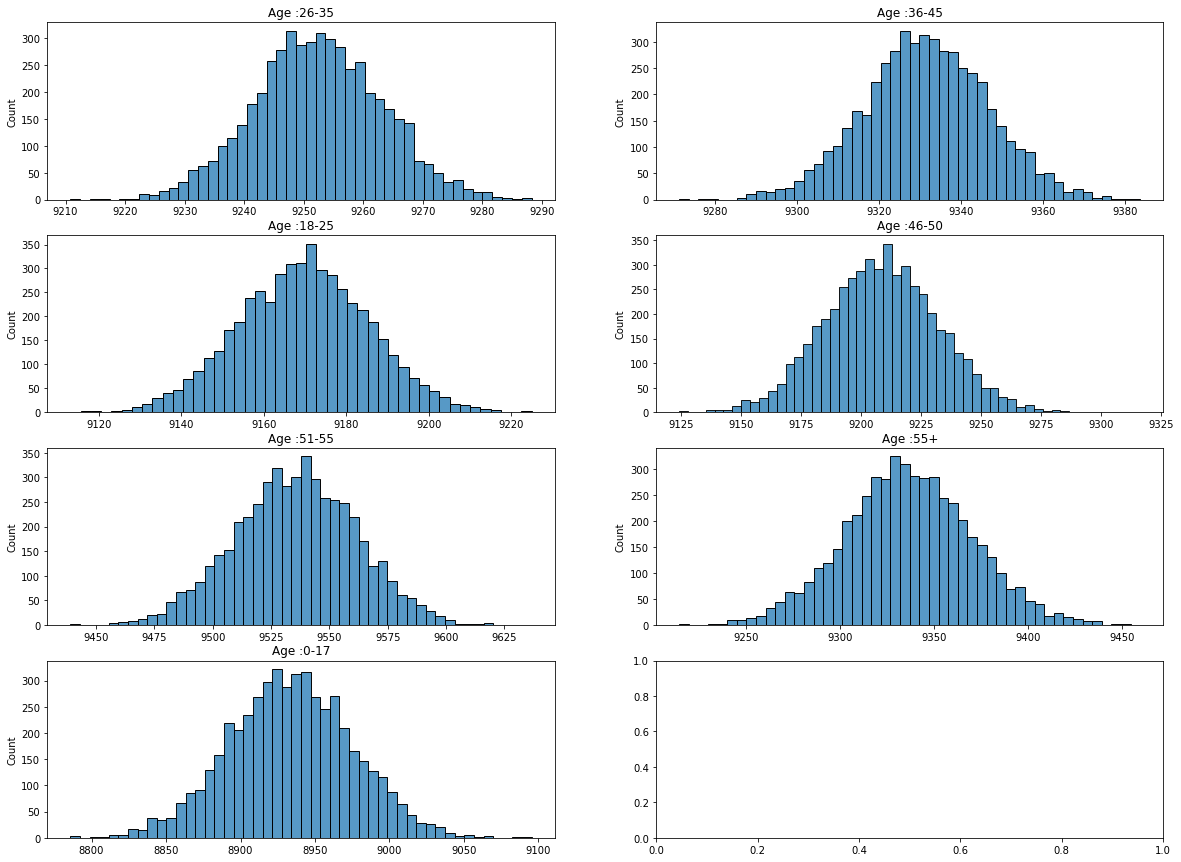

In [185]:
def boot_strap_method2(data, sample_size,confidence_intterval):
    ans=[]
    for reps in range(sample_size):
        bootstrapped_samples = np.random.choice(data, size=data.shape[0])
        bootstrapped_mean =  np.mean(bootstrapped_samples)
        ans.append(bootstrapped_mean)
    return ans
    

fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
# 99% CI 

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '26-35','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[0,0])
axis[0,0].set_title("Age :26-35")

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '36-45','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[0,1])
axis[0,1].set_title("Age :36-45")

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '18-25','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[1,0])
axis[1,0].set_title("Age :18-25")

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '46-50','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[1,1])
axis[1,1].set_title("Age :46-50")

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '51-55','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[2,0])
axis[2,0].set_title("Age :51-55")

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '55+','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[2,1])
axis[2,1].set_title("Age :55+")

sns.histplot(boot_strap_method2(data = df.loc[df['Age'] == '0-17','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[3,0])
axis[3,0].set_title("Age :0-17")

plt.show()

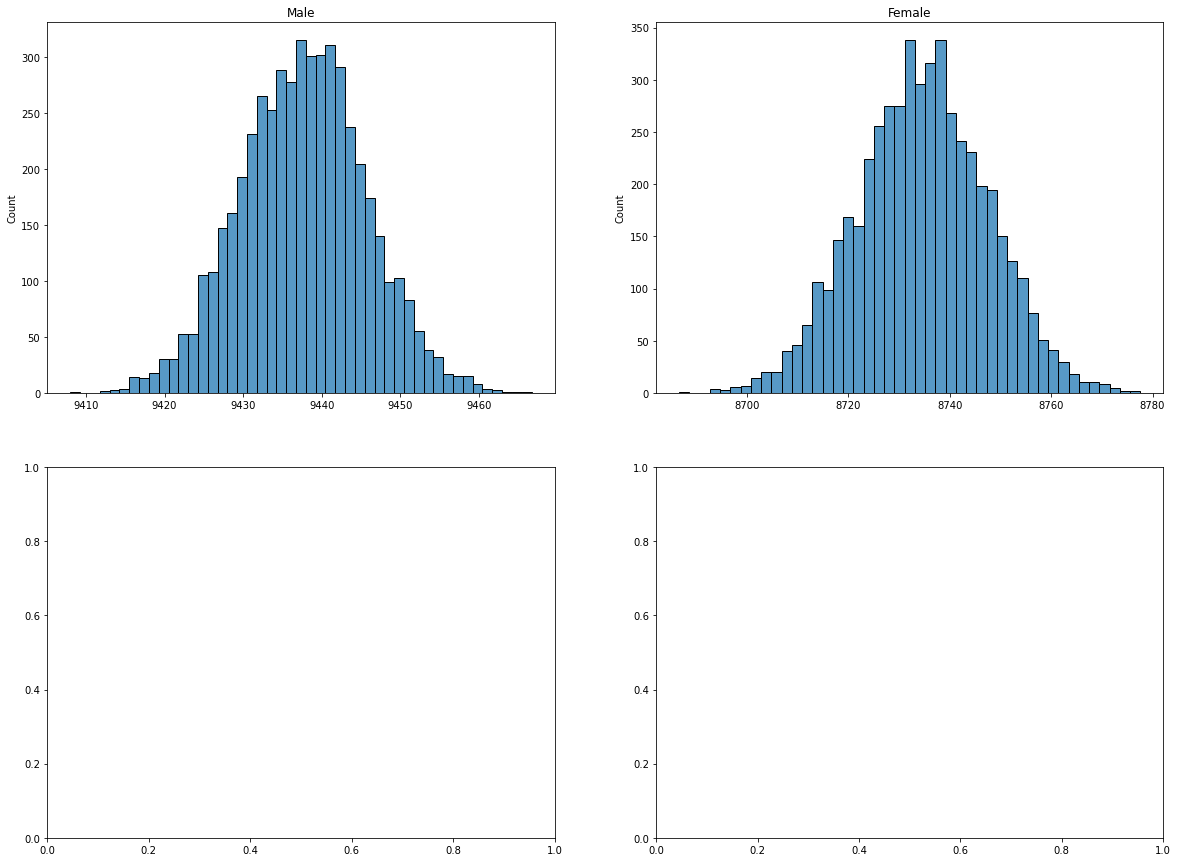

In [186]:
def boot_strap_method2(data, sample_size,confidence_intterval):
    ans=[]
    for reps in range(sample_size):
        bootstrapped_samples = np.random.choice(data, size=data.shape[0])
        bootstrapped_mean =  np.mean(bootstrapped_samples)
        ans.append(bootstrapped_mean)
    return ans
    

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# 99% CI 
sns.histplot(boot_strap_method2(data = df.loc[df['Gender'] == 'M','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[0,0])
axis[0,0].set_title("Male")

sns.histplot(boot_strap_method2(data = df.loc[df['Gender'] == 'F','Purchase'],
                                sample_size = 5000,confidence_intterval = 99),ax=axis[0,1])
axis[0,1].set_title("Female")


plt.show()

### Plot Univariate and Bivariate plots

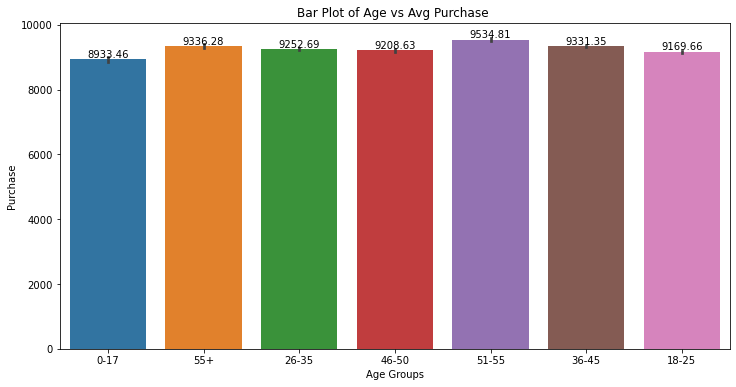

In [187]:
plt.figure(figsize=(12,6))

ax= sns.barplot(data = df , x='Age' ,y='Purchase')

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Age Groups')

plt.title('Bar Plot of Age vs Avg Purchase ')
plt.show()

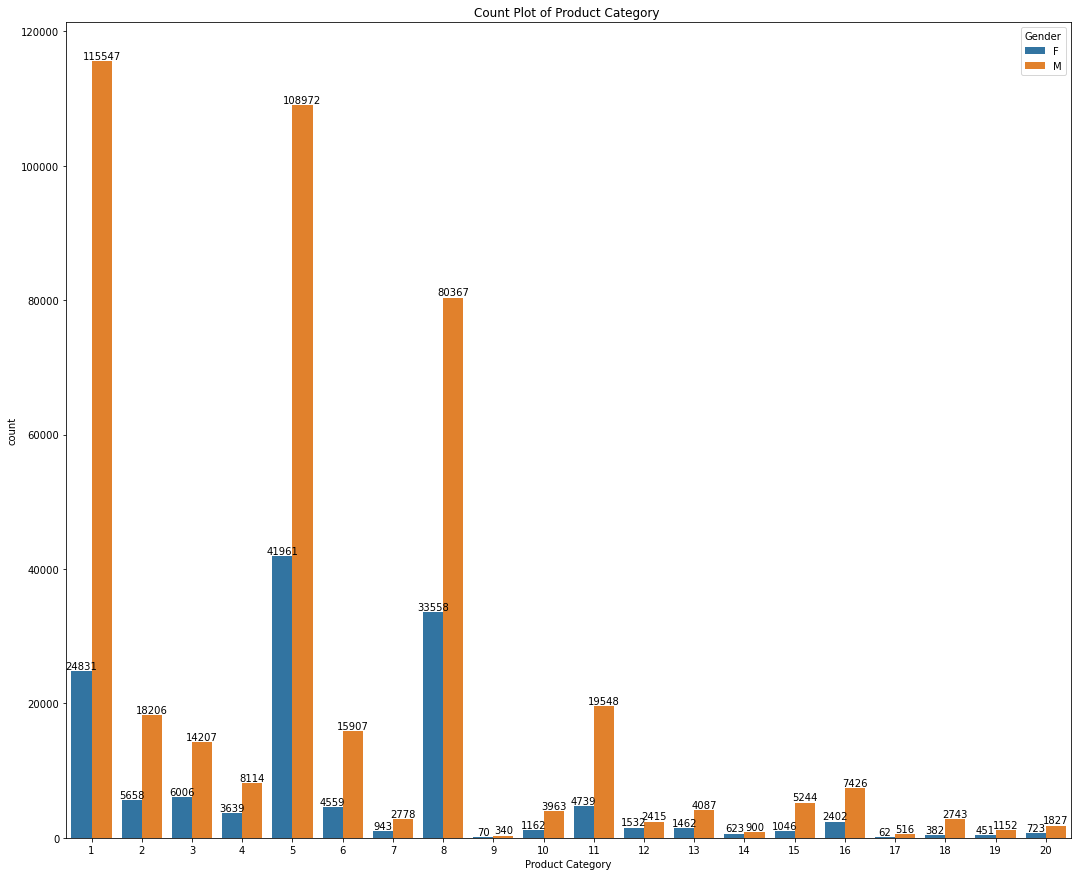

In [188]:
plt.figure(figsize=(18,15))

ax= sns.countplot(data = df , x='Product_Category', hue='Gender' )

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Product Category')

plt.title('Count Plot of Product Category ')
plt.show()

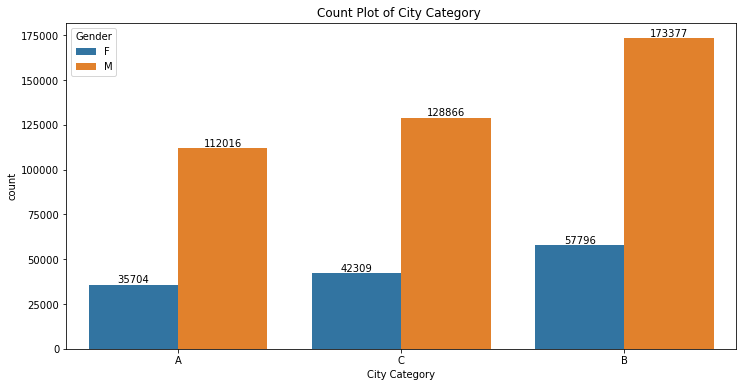

In [189]:
plt.figure(figsize=(12,6))

ax= sns.countplot(data = df , x='City_Category', hue='Gender' )

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('City Category')

plt.title('Count Plot of City Category ')
plt.show()

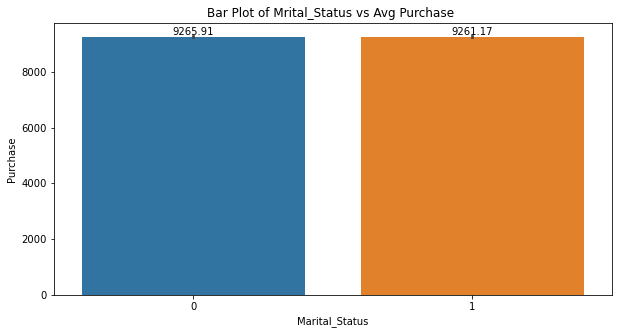

In [190]:
plt.figure(figsize=(10,5))

ax= sns.barplot(data = df , x='Marital_Status' ,y='Purchase')

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Marital_Status')

plt.title('Bar Plot of Mrital_Status vs Avg Purchase ')
plt.show()

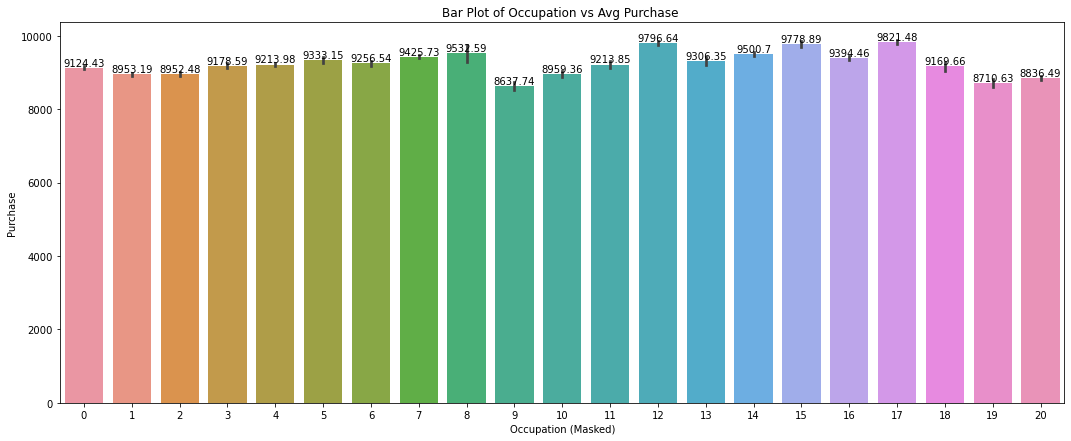

In [191]:
plt.figure(figsize=(18,7))

ax= sns.barplot(data = df , x='Occupation' ,y='Purchase')

for i in ax.containers:
    ax.bar_label(i)
    
plt.xlabel('Occupation (Masked)')

plt.title('Bar Plot of Occupation vs Avg Purchase ')
plt.show()

## Insights :- 

- There are no null values all columns.
- There are 2677 Total Outliers in Purchase Column.
- Confidence interval is the interval, we calculated using the sample data, within which the population parameter will lie .Below are the 90% CI , 95% CI and 99% CI values calulated for different Gender , Marital Status and Age Groups 

### Confidence Interval for Male / Female Average Amount Spend
- 90% CI for Male Average Spends = [9424 , 9450]  , 90% CI for Female Average Spends= [8713 , 8756] 
- 95% CI for Male Average Spends = [9422 , 9453]  , 95% CI for Female Average Spends= [8709 , 8760]
- 99% CI for Male Average Spends = [9417 , 9458]  , 99% CI for Female Average Spends= [8701 , 8768] 
- As we go from 90% CI to 95% CI and to 99% CI we see that the range / width of values keep on increasing as we increace the Percentage of Confidence Interval 
- Confidence Interval of Average Male and Female spends are NOT OVERLAPPING with each other in 90% , 95% and 99% CI.
- From  90% / 95% / 99% CI we can see the average amount spend by Male is large compared to females. 
- 90% CI for Male Average Spend Amount means that there is 90% chance that the confidence interval [9424 , 9450] contains population mean amount spend By Male customer.


### Confidence Interval for Single / Partnered Marital Status Average Amount Spend
- 90% CI for Single Status Average Spends = [9252 , 9281] , 90% CI for Partnered Average Spends= [9244, 9278] 
- 95% CI for Single Status Average Spends = [9249 , 9283] , 95% CI for Partnered Average Spends= [9240, 9282] 
- 99% CI for Single Status Average Spends = [9243 , 9288] , 99% CI for Partnered Average Spends= [9234, 9289] 
- As we go from 90% CI to 95% CI and to 99% CI we see that the width of CI  keep on increasing as we increace the Percentage of Confidence Interval . 
- Confidence Interval of Average spends of Single and Partnered Marital Status Customer are overlapping with each other in 90% , 95% and 99% CI.
- 90% Confidence intervals of average spends of Single and Partnered marital status people ARE OVERLAPPING in average spends range of (9252,9278)
- 95% Confidence intervals of average spends of Single and Partnered marital status customers ARE OVERLAPPING in average spends range of (9249,9282)
- 99% Confidence intervals of average spends of Single and Partnered marital status customers ARE OVERLAPPING in average spends range of (9243,9288)
- From  90% / 95% / 99% CI we can see the average amount spend by Single Marital Status customer is almost same to Partnered Marital Status Customer.

### Confidence Interval for each age group Average Amount Spend
- 90% CI for Age Group 26-35 Average Spends: (9235, 9270)
- 90% CI for Age Group 36-45 Average Spends: (9306, 9356)
- 90% CI for Age Group 18-25 Average Spends: (9143, 9195)
- 90% CI for Age Group 46-50 Average Spends: (9170, 9246)
- 90% CI for Age Group 51-55 Average Spends: (9492, 9577)
- 90% CI for Age Group 55+ Average Spends:   (9280, 9392)
- 90% CI for Age Group 0-17 Average Spends:  (8864, 9001)
- 90% Confidence Interval ARE OVERLAPPING for Age Group 18-25 and 46-50 with average spend in range (9170,9195). And there is overlapping for Age group 36-45 and 55+ with average spend in range (9306,9356) . 


- 95% CI for Age Group 26-35 Average Spends: (9231, 9273)
- 95% CI for Age Group 36-45 Average Spends: (9301, 9361)
- 95% CI for Age Group 18-25 Average Spends: (9138, 9200)
- 95% CI for Age Group 46-50 Average Spends: (9163, 9254)
- 95% CI for Age Group 51-55 Average Spends: (9483, 9585)
- 95% CI for Age Group 55+ Average Spends:   (9269, 9403)
- 95% CI for Age Group 0-17 Average Spends:  (8851, 9014)
- 95% Confidence Interval ARE OVERLAPPING for Age Group 18-25 and 46-50 with average spend in range (9163,9200) . Also overlapping for Age group 26-35 and 55+ with average spend in range (9269,9273) . And there is overlapping for Age group 36-45 and 55+ with average spend in range (9301,9361) . 


- 99% CI for Age Group 26-35 Average Spends: (9225, 9280)
- 99% CI for Age Group 36-45 Average Spends: (9292, 9370)
- 99% CI for Age Group 18-25 Average Spends: (9128, 9210)
- 99% CI for Age Group 46-50 Average Spends: (9148, 9268)
- 99% CI for Age Group 51-55 Average Spends: (9468, 9601)
- 99% CI for Age Group 55+ Average Spends:   (9248, 9424)
- 99% CI for Age Group 0-17 Average Spends:  (8826, 9040)
- 99% Confidence Interval ARE OVERLAPPING for Age Group 18-25 and 46-50 with average spend in range (9148,9210) . There is overlapping for Age group 26-35 and 55+ with average spend in range (9248,9280) . And there is overlapping for Age group 36-45 and 55+ with average spend in range (9292,9370) . 

- As we go from 90% CI to 95% CI and to 99% CI we see that the width of CI  keep on increasing as we increace the Percentage of Confidence Interval . 
- Confidence Interval of Average spends of each Age Group Customer are overlapping with each other in 90% , 95% and 99% CI for few age groups.
- From  90% / 95% / 99% CI we can see the average amount spend by 51-55 Age group customer is highest and the average amount spend by 0-17 Age group customer is lowest .

## Recommendations :- 
 
- Confidence Interval of Average Male and Female spends are NOT OVERLAPPING with each other in 90% , 95% and 99% CI. So we can say that the male population average spends is more than female population average spends this can be inferred as the 90% / 95% /99% CI  ( Eg. Male has higher lower and upper paramters in 99% CI as compared to female 99% CI ) . So Company needs to Target more of Female audience to reduce the gap between Male and Femal avg. amount spend.  Note : Confidence interval is the interval, we calculated using the sample data, within which the population parameter will lie .

- Company should focus on retaining the male customers. More of female focused products should be introduced and special discounts - like clearance sale on existing female products can be done to increase the average amount spend by female.

- From Confidence Interval for Avg. amount spend by each age group we can see Age Group 51-55 has the highest avg. spend amount and the Age Group 0-17 has least avg. spend amount that is expected as cusotmer of age gorup 0-17 are considered children /minor  and generally thier parents will buy products for them. The difference in avg. spend amount between Age group 51-55 and other age groups is not much , so this is a plus point showing company has wide variety of products catering to needs of all major age groups.

- 99% Confidence Interval ARE OVERLAPPING for Age Group 18-25 and 46-50 for average spend amount . There is overlapping for Age group 26-35 and 55+ for average spend amount . And there is overlapping for Age group 36-45 and 55+ for average spendamount. So we cannot compare these groups with each other to check if avg. amount spend is higher or lower compared to other.

- Company should target more of younger Age Groups Like 18-25 , 26-35 and 36-45 . New Products in field of technology can be introduced . Cashbacks and special discounts like student discount can be given to 18-25 Age Group People.

- 90% and 95% and 99% Confidence intervals of average spends of Single and Partnered marital status people ARE OVERLAPPING so we cannoty compare Single and Partneres Marital Status customer  with each other for highest or lowest average spend amount .

- From Count Plot of City Category we can see that Count of orders purchased by Female in All cities A, B, C are almost 30% to that of Male. So city wise campaign and adviretisement can be done specially for Female Gender to encourage more females to buy products from Walmart . 

- Seeing the Count Plot of Product Category we can see that Product Category 1 , 5 and 8 are most ordered product category among males and females . And product category 7, 9,10,12,13,14,15,16,17,18,19,20 are least ordered categories.  These least order product categories must be either changed with new product categories or latest products in these categories must be introduced .

- Company can introduce programs such as loyalty program where in they give cashback to thier most frequent customers. 

